In [1]:
import moviepy.editor as mp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal
import wave, sys
import audio2numpy as a2n
from audio2numpy import open_audio
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.io.wavfile import read
import scipy.io
from pydub import AudioSegment
import pandas as pd
import os
import ffmpeg

In [35]:
### Define all video paths and file titles

owd = os.getcwd()
raw_video_dir = r'\Users\greenhouselab\Documents\Rubi\typingtask_data\pilot_data\p08_marygach_08022022\task_video\right\raw' ## change as needed
save_dir = r'\Users\greenhouselab\Documents\Rubi\typingtask_data\pilot_data\p08_marygach_08022022\task_video\right\edited' ## change as needed
whole_video_name = r'p08_08022022_right_wholetask.mp4' ## change to match task subject, date, and camera view
all_clips_name = r'p08_08022022_right_allclips.mp4'
audio_name = r'p08_08022022_right.wav' ## change to match task subject, date, and camera view
video_prefix = 'p08_08022022_right'
os.chdir(save_dir)

In [3]:
### concatenating all go-pro videos of interest into one
f = open('video_path_file.txt', 'w')
for filename in os.scandir(raw_video_dir):
    if filename.is_file():
        f.write('file \'' + filename.path + '\'')
        f.write('\n')
f.close()

concatenate = 'ffmpeg -f concat -safe 0 -i video_path_file.txt -c copy %s'  % (whole_video_name)
os.system(concatenate) ## output of 0 means it worked :) 

0

In [4]:
### importing whole task video into moviepy format
video_dir = save_dir + '\\' + whole_video_name
video = mp.VideoFileClip(video_dir)

In [5]:
### extracting audio file from video
audio = video.audio.write_audiofile(audio_name)

MoviePy - Writing audio in s177_08192022_aerial.wav


MoviePy - Done.


In [6]:
### turning stereo audio file to mono
audio = AudioSegment.from_wav(audio_name)
audio = audio.set_channels(1)
audio = audio.export(save_dir + '\\' + audio_name, format="wav")

In [7]:
### making numpy array from audio file
sample_rate, samples = wavfile.read(audio)

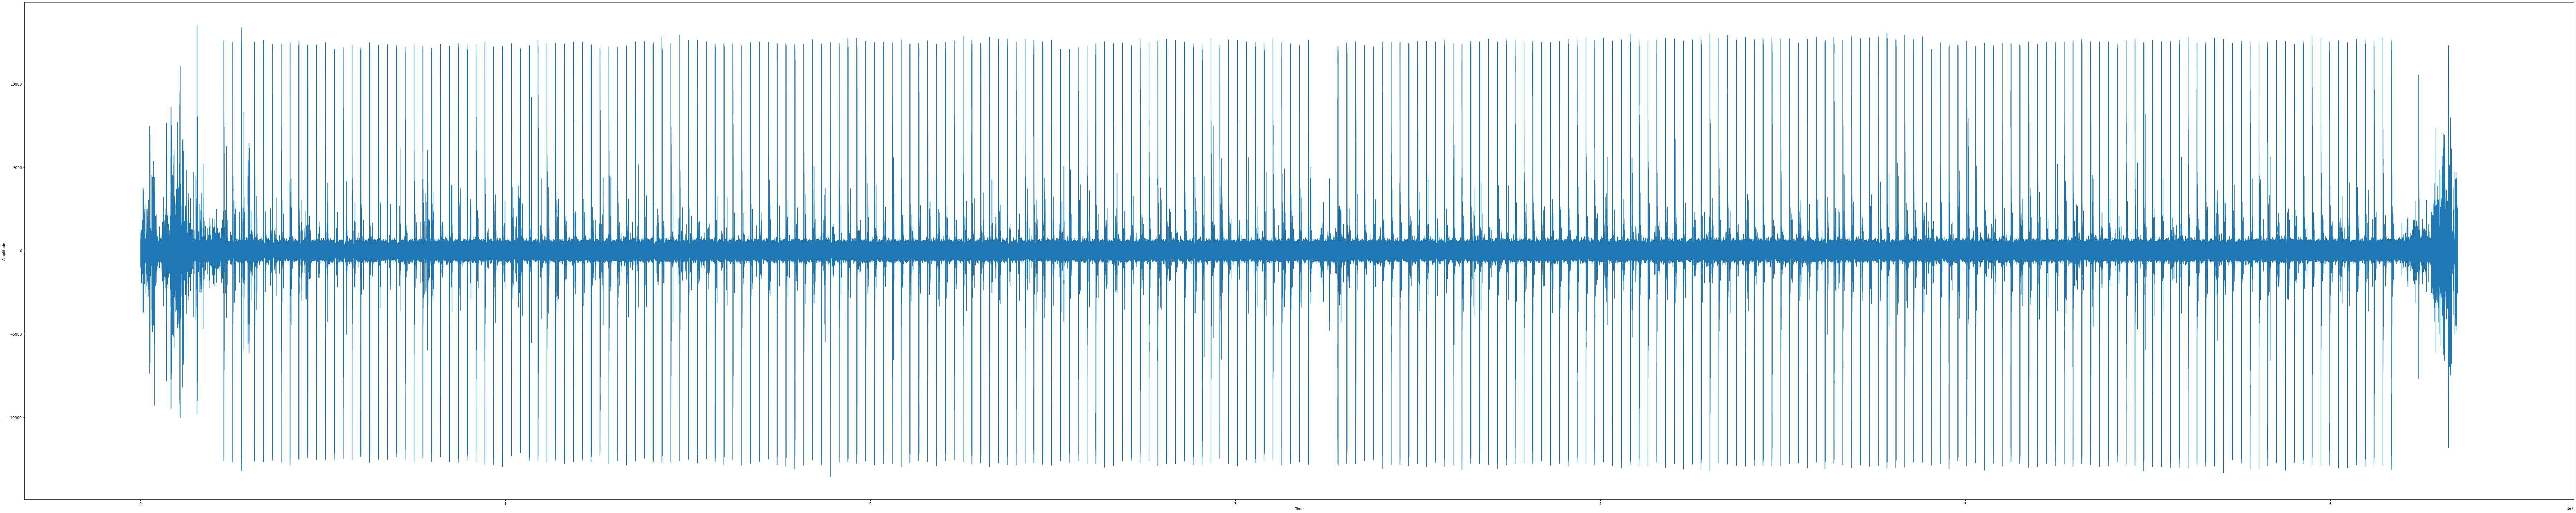

In [8]:
### Plotting sound file
plt.rcParams["figure.figsize"] = [100, 20]
plt.rcParams["figure.autolayout"] = True
input_data = samples
plt.plot(input_data)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.ylim()
plt.xlim()
plt.show()

In [9]:
# run peak detection to see if there are 240 peaks here
indexes, _ = scipy.signal.find_peaks(samples, height=7, distance=2.1)
print('Peaks are: %s' % (indexes))
print(len(indexes))

Peaks are: [   10496    11117    11134 ... 63496904 63496921 63496937]
2884591


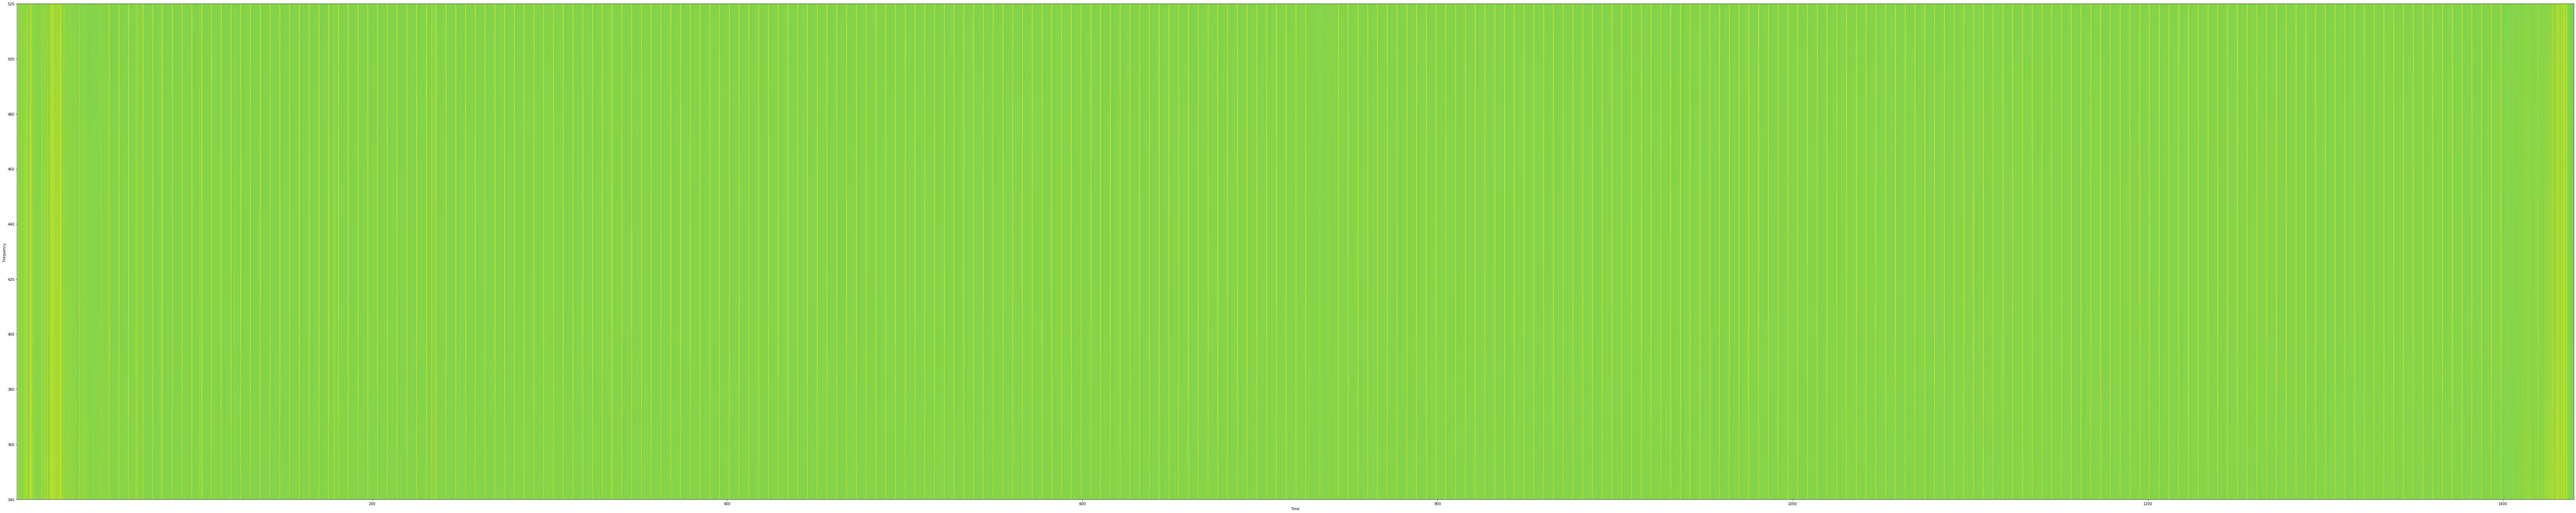

In [10]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(samples, Fs=sample_rate)
plt.rcParams["figure.figsize"] = [12, 6]
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(340, 520)
plt.show()

In [11]:
## need to go through the row that correponds with 440hz (2 and 3 are closest) in powerspectrum, and time stamps of peaks. 
frequenciesFound

array([    0.      ,   172.265625,   344.53125 ,   516.796875,
         689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
        1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
        2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
        2756.25    ,  2928.515625,  3100.78125 ,  3273.046875,
        3445.3125  ,  3617.578125,  3789.84375 ,  3962.109375,
        4134.375   ,  4306.640625,  4478.90625 ,  4651.171875,
        4823.4375  ,  4995.703125,  5167.96875 ,  5340.234375,
        5512.5     ,  5684.765625,  5857.03125 ,  6029.296875,
        6201.5625  ,  6373.828125,  6546.09375 ,  6718.359375,
        6890.625   ,  7062.890625,  7235.15625 ,  7407.421875,
        7579.6875  ,  7751.953125,  7924.21875 ,  8096.484375,
        8268.75    ,  8441.015625,  8613.28125 ,  8785.546875,
        8957.8125  ,  9130.078125,  9302.34375 ,  9474.609375,
        9646.875   ,  9819.140625,  9991.40625 , 10163.671875,
       10335.9375  , 10508.203125, 10680.46875 , 10852.

In [12]:
time[2]

0.008707482993197279

In [13]:
powerSpectrum[3]

array([ 0.        ,  0.        ,  0.        , ..., 78.03876107,
       52.70014714,  8.94359758])

In [14]:
# def find_beep(freq):
#     lowA = pd.()
#     for x in freq:
#         lowA.append(x)

In [15]:
# find_beep(powerSpectrum[3])

In [16]:
## other beep is 523.25Hz


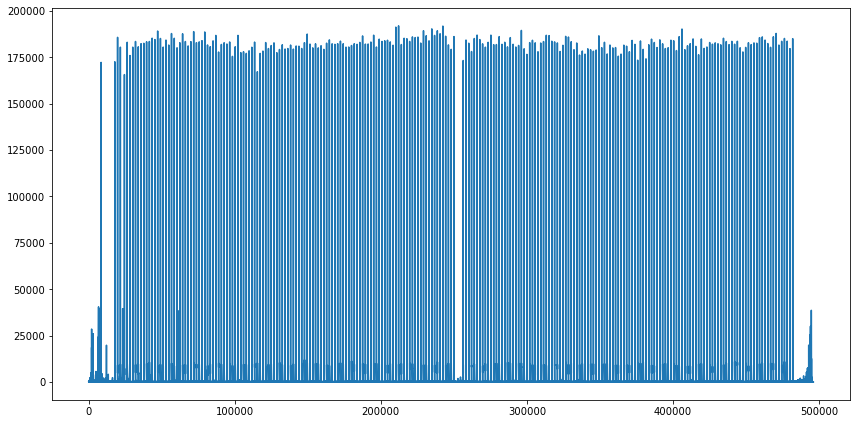

<Figure size 8640x1440 with 0 Axes>

In [17]:
lowA = np.array(powerSpectrum[2])
# plt.rcParams.update({'font.size': 50})
plt.plot(lowA)
plt.xlim()
plt.ylim()
plt.figure(figsize=(120, 20))
plt.show()

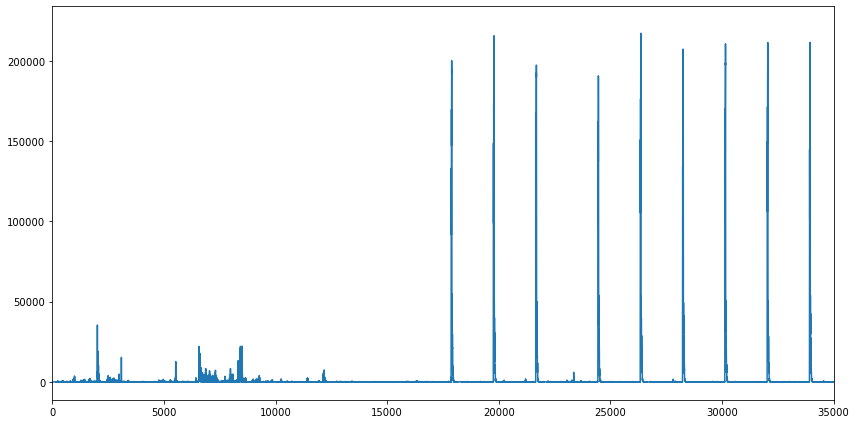

In [18]:
highA = np.array(powerSpectrum[3])
plt.plot(highA)
# plt.figure(figsize=(120, 20))
plt.xlim(0, 35000)
plt.ylim()
# plt.xticks(np.arange(0, 190000, step=5000))
plt.show()

In [21]:
indexes, _ = scipy.signal.find_peaks(highA, height=150000, distance=120)
len(indexes)

243

In [22]:
indexes

array([ 17887,  19782,  21682,  24459,  26363,  28259,  30154,  32049,
        33946,  35846,  37741,  39636,  41531,  43426,  45322,  47218,
        49112,  51007,  52903,  54798,  56692,  58588,  60488,  62390,
        64285,  66180,  68075,  69971,  71865,  73760,  75655,  77551,
        79446,  81347,  83242,  85138,  87032,  88927,  90822,  92718,
        94613,  96509,  98404, 100299, 102194, 104089, 105990, 107885,
       109782, 111675, 113570, 115472, 117367, 119262, 121157, 123052,
       124947, 126842, 128738, 130632, 132529, 134423, 136318, 138213,
       140115, 142010, 143905, 145800, 147695, 149590, 151485, 153380,
       155276, 157172, 159066, 160961, 162857, 164752, 166647, 168542,
       170438, 172332, 174227, 176122, 178018, 179913, 181808, 183703,
       185599, 187494, 189389, 191284, 193179, 195074, 196969, 198864,
       200760, 202655, 204551, 206445, 208340, 210237, 212131, 214026,
       215921, 217817, 219711, 221606, 223502, 225397, 227292, 229187,
      

In [23]:
np.argwhere(indexes == 491663)

array([], shape=(0, 1), dtype=int64)

In [24]:
## deleting unwanted peaks (should only be used for data pre-block indicating beep)
indexes = np.delete(indexes, [0, 1, 2])
len(indexes) ## length should always be 240

240

In [25]:
## get time stamps for each peak from 'time' output of spectrogram
def find_peak_times(): 
    peak_times = np.empty(np.shape(indexes))
    for idx, x in enumerate(indexes):
        stamp = time[x]
        peak_times[idx] = stamp
    return peak_times

In [26]:
cut_times = (find_peak_times()).tolist()
len(cut_times) ## should still be 240

240

In [27]:
for idx, cut in enumerate(cut_times):
    command = 'ffmpeg -t 3.5 -ss %s -i "%s" -y %s_trial_%s.mp4' % (cut, video_dir, video_prefix, idx)
    # print(command)
    os.system(command)

In [36]:
### concatenating clipped trial videos into one
### FOR PILOT VIDEOS ONLY
res = []
for file in os.listdir(save_dir):
    if file.__contains__('trial'):
        res.append(file)
print(len(res))

f = open('clip_path_file.txt', 'w')
for filename in res:
        f.write('file \'' + save_dir + '\\' + filename + '\'')
        f.write('\n')
f.close()

concatenate = 'ffmpeg -f concat -safe 0 -i clip_path_file.txt -c copy %s'  % (all_clips_name)
os.system(concatenate) ## output of 0 means it worked :) 

240


0